In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from textblob import TextBlob
import nltk
import string

nltk.download('stopwords')
nltk.download('punkt')

df=pd.read_csv('Juegos.csv')
df.columns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# No existe ninguna fila repetida, por lo que el enfoque iria en realizar el analisis de los datos
duplicated_rows = df[df.duplicated(keep=False)]
print(len(duplicated_rows))

0


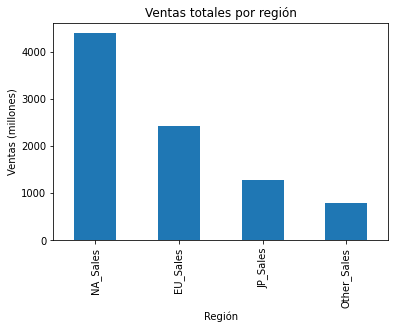

In [ ]:
# ¿Qué zona es la que más ventas tiene?
ventas_por_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Crear un gráfico de barras
ventas_por_region.plot(kind='bar')

# Configurar el título y los ejes
plt.title('Ventas totales por región')
plt.xlabel('Región')
plt.ylabel('Ventas (millones)')

# Mostrar el gráfico
plt.show()

Ventas totales sin año:  99.99
Ventas totales con año:  8815.86


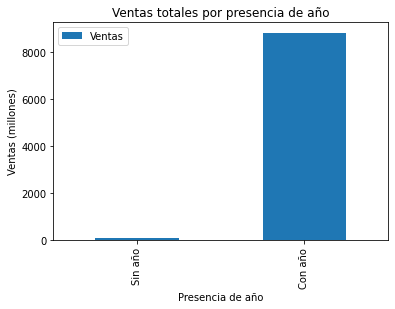

In [ ]:
# Los juegos con años faltantes tienen menor venta que los juegos con año publicado

# Identificar los juegos con año faltante
juegos_sin_anio = df[df['Year'].isna()]

# Identificar los juegos con año publicado
juegos_con_anio = df[df['Year'].notna()]

# Calcular las ventas totales por grupo
ventas_sin_anio = juegos_sin_anio[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sum()
ventas_con_anio = juegos_con_anio[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sum()

# Imprimir las ventas totales por grupo
print("Ventas totales sin año: ", ventas_sin_anio)
print("Ventas totales con año: ", ventas_con_anio)

# Crear un gráfico de barras
ventas_por_anio = pd.DataFrame({'Ventas': [ventas_sin_anio, ventas_con_anio]}, index=['Sin año', 'Con año'])
ventas_por_anio.plot(kind='bar')

# Configurar el título y los ejes
plt.title('Ventas totales por presencia de año')
plt.xlabel('Presencia de año')
plt.ylabel('Ventas (millones)')

# Mostrar el gráfico
plt.show()

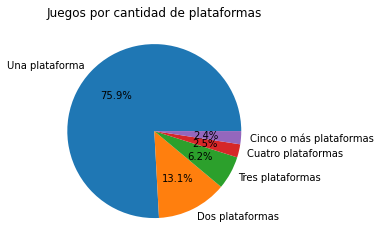

In [ ]:
# porcentaje de juegos que estan en todas las plataformas

# Contar el número de plataformas en las que aparece cada juego
plataformas_por_juego = df.groupby('Name')['Platform'].nunique()

# Contar el número de juegos que aparecen en cada categoría de cantidad de plataformas
unicaplataforma = (plataformas_por_juego == 1).sum()
dos_plataformas = ((plataformas_por_juego > 1) & (plataformas_por_juego <= 2)).sum()
tres_plataformas = ((plataformas_por_juego > 2) & (plataformas_por_juego <= 3)).sum()
cuatro_plataformas = ((plataformas_por_juego > 3) & (plataformas_por_juego <= 4)).sum()
cinco_o_mas_plataformas = (plataformas_por_juego > 4).sum()

# Crear una lista de etiquetas y valores para el gráfico en pie
etiquetas = ['Una plataforma', 'Dos plataformas', 'Tres plataformas', 'Cuatro plataformas', 'Cinco o más plataformas']
valores = [unicaplataforma, dos_plataformas, tres_plataformas, cuatro_plataformas, cinco_o_mas_plataformas]

# Crear el gráfico en pie
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.title('Juegos por cantidad de plataformas')
plt.show()

In [ ]:
# cuales son las plataformas existentes

num_publishers = df['Publisher'].nunique()
print(f"Existen {num_publishers} empresas diferentes en la base de datos.")


Existen 578 empresas diferentes en la base de datos.


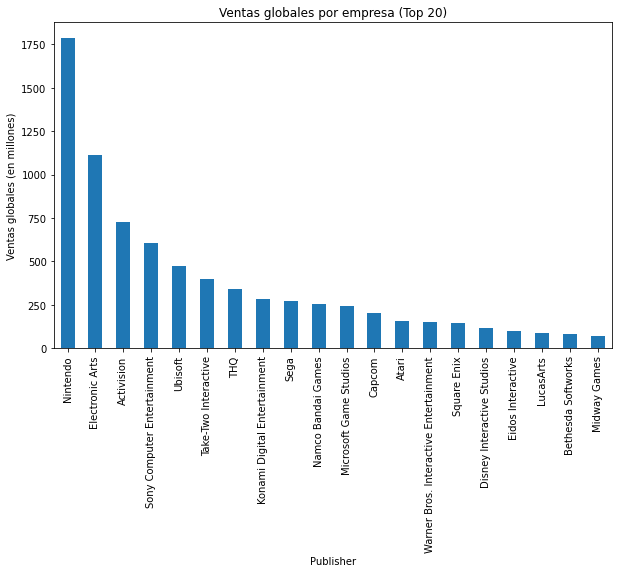

In [ ]:
# que empresa es la que mas vende

# Agrupa los datos por empresa y suma las ventas globales
sales_by_publisher = df.groupby('Publisher')['Global_Sales'].sum()

# Ordena los resultados en orden descendente
sales_by_publisher = sales_by_publisher.sort_values(ascending=False)

# Selecciona las 10 empresas con mayores ventas
top_publishers = sales_by_publisher[:20]

# Crea la gráfica de barras
top_publishers.plot(kind='bar', figsize=(10,6))
plt.xlabel('Publisher')
plt.ylabel('Ventas globales (en millones)')
plt.title('Ventas globales por empresa (Top 20)')
plt.show()



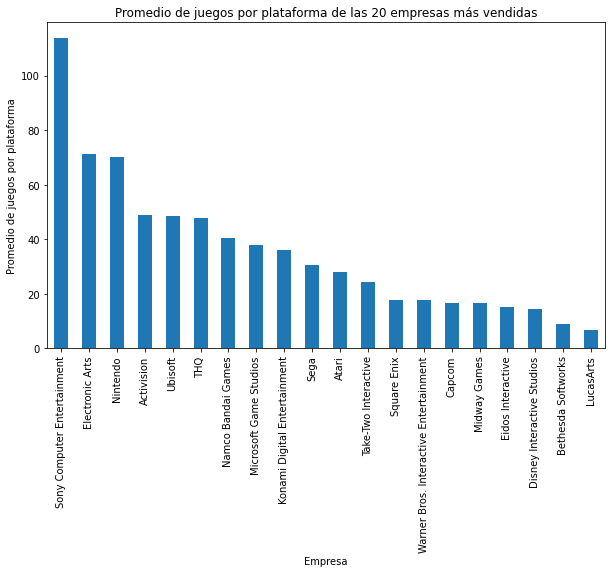

In [ ]:
# promedio de juegos que tienen las empresas, plataforma

# Obtener la lista de las 20 empresas más vendidas
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(20).index.tolist()

# Filtrar la base de datos para obtener solo los registros de las 20 empresas más vendidas
df_top_publishers = df[df['Publisher'].isin(top_publishers)]

# Agrupar los datos por empresa y plataforma y contar el número de juegos de cada grupo
games_by_publisher_platform = df_top_publishers.groupby(['Publisher', 'Platform'])['Name'].count()

# Calcular el promedio de juegos por plataforma de cada empresa
mean_games_by_publisher_platform = games_by_publisher_platform.groupby('Publisher').mean()

# Ordenar las empresas de la más vendida a la menos vendida
mean_games_by_publisher_platform = mean_games_by_publisher_platform.sort_values(ascending=False)

# Crear la gráfica de barras
mean_games_by_publisher_platform.plot(kind='bar', figsize=(10,6))
plt.xlabel('Empresa')
plt.ylabel('Promedio de juegos por plataforma')
plt.title('Promedio de juegos por plataforma de las 20 empresas más vendidas')
plt.show()


1980.0 Asteroids
1981.0 Pitfall!
1982.0 Pac-Man
1983.0 Baseball
1984.0 Duck Hunt
1985.0 Super Mario Bros.
1986.0 The Legend of Zelda
1987.0 Zelda II: The Adventure of Link
1988.0 Super Mario Bros. 3
1989.0 Tetris
1990.0 Super Mario World
1991.0 The Legend of Zelda: A Link to the Past
1992.0 Super Mario Land 2: 6 Golden Coins
1993.0 Super Mario All-Stars
1994.0 Donkey Kong Country
1995.0 Donkey Kong Country 2: Diddy's Kong Quest
1996.0 Pokemon Red/Pokemon Blue
1997.0 Gran Turismo
1998.0 Pokémon Yellow: Special Pikachu Edition
1999.0 Pokemon Gold/Pokemon Silver
2000.0 Pokémon Crystal Version
2001.0 Gran Turismo 3: A-Spec
2002.0 Grand Theft Auto: Vice City
2003.0 Need for Speed Underground
2004.0 Grand Theft Auto: San Andreas
2005.0 Nintendogs
2006.0 Wii Sports
2007.0 Wii Fit
2008.0 Mario Kart Wii
2009.0 Wii Sports Resort
2010.0 Kinect Adventures!
2011.0 Call of Duty: Modern Warfare 3
2012.0 Call of Duty: Black Ops II
2013.0 Grand Theft Auto V
2014.0 Grand Theft Auto V
2015.0 Call of Duty

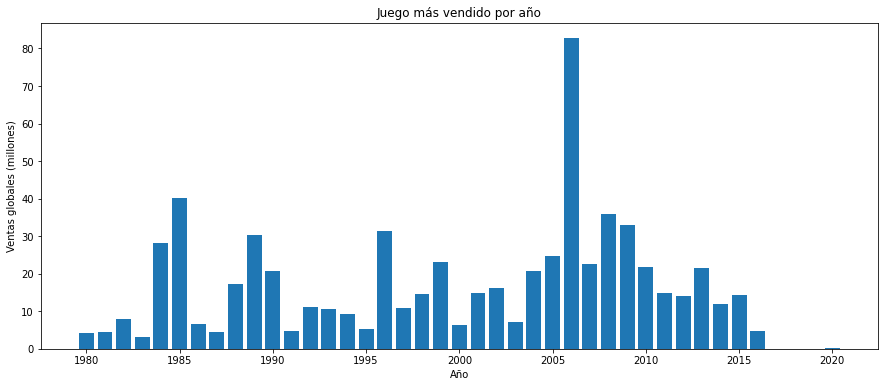

In [ ]:
# grafico de juegos mas vendidos por años

# Eliminar las filas con año faltante
df = df[df['Year'].notnull()]

# Agrupar por año y encontrar el juego más vendido
juegos_mas_vendidos = df.loc[df.groupby('Year')['Global_Sales'].idxmax()]

# Establecer el año como índice
juegos_mas_vendidos.set_index('Year', inplace=True)

# Imprimir el juego más vendido para cada año
for year, row in juegos_mas_vendidos.iterrows():
    print(year, row['Name'])

# Crear la figura y los subplots
fig, (ax) = plt.subplots(figsize=(15,6))

# Graficar los juegos más vendidos por año
ax.bar(juegos_mas_vendidos.index, juegos_mas_vendidos['Global_Sales'])
ax.set_xlabel('Año')
ax.set_ylabel('Ventas globales (millones)')
ax.set_title('Juego más vendido por año')
# Mostrar la figura
plt.show()

La plataforma que vende más entre los juegos en multiplataforma es: PS3


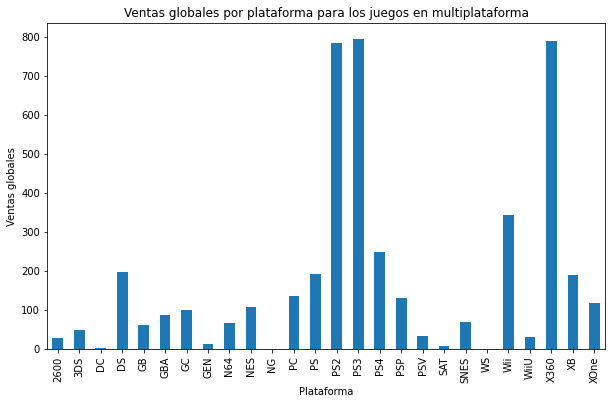

In [ ]:
# entre las empresas que crean juegos multiplataforma que plataforma vende mas

# Filtrar solo los juegos en multiplataforma
multiplataforma = df[df.groupby('Name')['Platform'].transform('nunique') > 1]

# Sumar las ventas globales de cada plataforma
ventas_por_plataforma = multiplataforma.groupby('Platform')['Global_Sales'].sum()

# Obtener la plataforma con el total más alto de ventas
plataforma_mas_vendida = ventas_por_plataforma.idxmax()

print(f"La plataforma que vende más entre los juegos en multiplataforma es: {plataforma_mas_vendida}")

# Agrupar las ventas globales por plataforma
ventas_por_plataforma = multiplataforma.groupby('Platform')['Global_Sales'].sum()

# Crear el gráfico de barras
ventas_por_plataforma.plot(kind='bar', figsize=(10,6))
plt.xlabel("Plataforma")
plt.ylabel("Ventas globales")
plt.title("Ventas globales por plataforma para los juegos en multiplataforma")
plt.show()


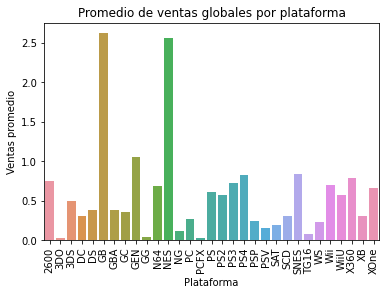

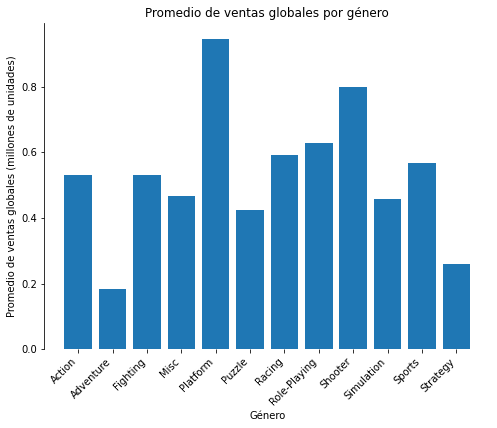

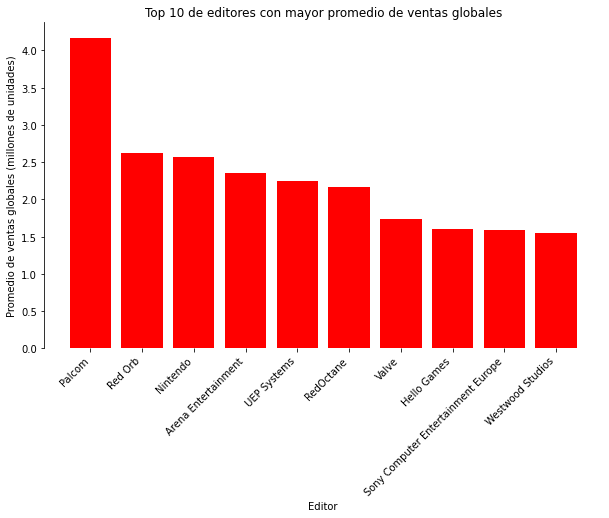

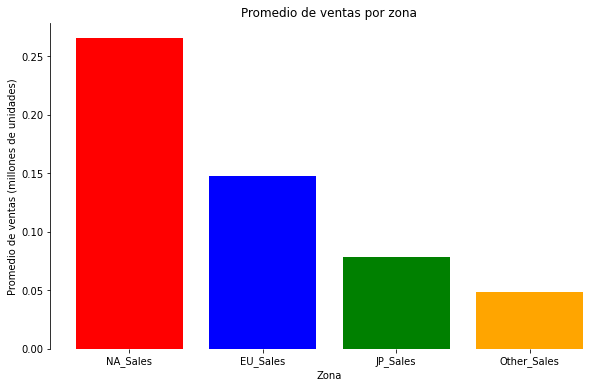

In [ ]:
# grafico de promedio de ventas por plataforma, genero, empresa, zona

#Promedio de ventas por plataforma

# Agrupar los datos por plataforma y calcular el promedio de las ventas globales
ventas_promedio = df.groupby('Platform')['Global_Sales'].mean().reset_index()

# Crear el gráfico de barras con los nombres de las plataformas rotados verticalmente
ax = sns.barplot(x='Platform', y='Global_Sales', data=ventas_promedio)
ax.set_xticklabels(ventas_promedio['Platform'], rotation=90)
plt.xlabel("Plataforma")
plt.ylabel("Ventas promedio")
plt.title("Promedio de ventas globales por plataforma")
plt.show()



#promedio de ventas por genero

# Calcular el promedio de ventas por género
mean_sales_by_genre = df.groupby('Genre')['Global_Sales'].mean()

# Crear un gráfico de barras para mostrar el promedio de ventas por género
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(mean_sales_by_genre.index, mean_sales_by_genre.values)
ax.set(xlabel="Género", ylabel="Promedio de ventas globales (millones de unidades)",
       title="Promedio de ventas globales por género")
plt.xticks(rotation=45, ha='right')
sns.despine(bottom=True)
plt.show()

#Promedio de ventas por editor

# Calcular el promedio de ventas por editor
mean_sales_by_publisher = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)[:10]

# Crear un gráfico de barras para mostrar el promedio de ventas por editor
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(mean_sales_by_publisher.index, mean_sales_by_publisher.values, color='red')
ax.set(xlabel="Editor", ylabel="Promedio de ventas globales (millones de unidades)",
       title="Top 10 de editores con mayor promedio de ventas globales")
plt.xticks(rotation=45, ha='right')
sns.despine(bottom=True)
plt.show()

# Calcular el promedio de ventas por zona
mean_sales_by_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

# Crear un gráfico de barras agrupadas para mostrar el promedio de ventas por zona
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(mean_sales_by_region.index, mean_sales_by_region.values, color=['red', 'blue', 'green', 'orange'])
ax.set(xlabel="Zona", ylabel="Promedio de ventas (millones de unidades)",
       title="Promedio de ventas por zona")
sns.despine(bottom=True)
plt.show()

In [ ]:
df.groupby("NA_Sales")["Global_Sales"].sum()

NA_Sales
0.00     609.94
0.01      37.45
0.02      37.21
0.03      43.06
0.04      45.23
          ...  
15.85     35.82
23.20     30.26
26.93     28.31
29.08     40.24
41.49     82.74
Name: Global_Sales, Length: 408, dtype: float64

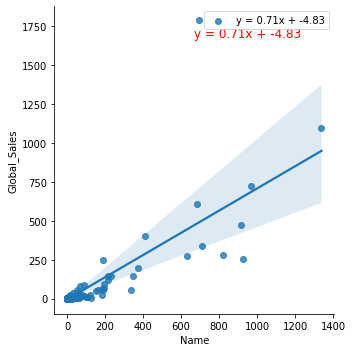

In [ ]:
# cual es la relacion entre el numero de juegos de una empresa y sus ventas

# Crear un DataFrame con los datos necesarios
publisher_data = df.groupby('Publisher').agg({'Name': 'count', 'Global_Sales': 'sum'})
publisher_data.reset_index(inplace=True)

# Crear un lmplot para visualizar la relación entre el número de juegos y las ventas por empresa
sns.lmplot(x='Name', y='Global_Sales', data=publisher_data)

# Añadir la ecuación de la línea de regresión en un legend
slope, intercept = np.polyfit(publisher_data['Name'], publisher_data['Global_Sales'], 1)
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')
plt.legend([equation])

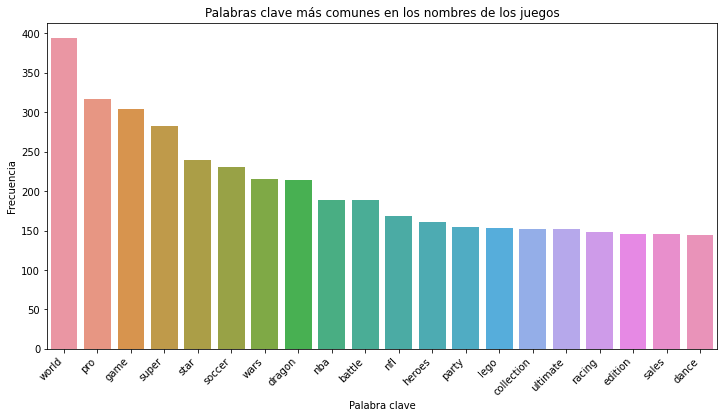

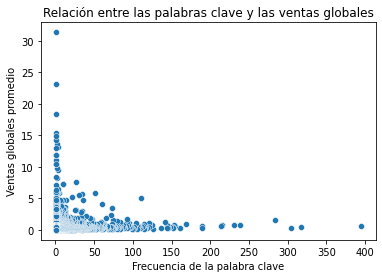

Correlación entre la frecuencia de las palabras clave y las ventas globales:
                 Count  Global_Sales
Count         1.000000      0.080329
Global_Sales  0.080329      1.000000


In [ ]:
# buscar palabras clave que se repitan dentro de los juegos

from nltk.corpus import stopwords
import re


# Eliminar puntuaciones y convertir todo a minúsculas
df['Name'] = df['Name'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Obtener las palabras comunes a eliminar
stop_words = set(stopwords.words('english'))

# Crear una función para obtener las palabras clave
def get_keywords(name):
    keywords = []
    for word in name.split():
        if word not in stop_words and len(word) > 2:
            keywords.append(word)
    return keywords

# Crear una columna con las palabras clave
df['Keywords'] = df['Name'].apply(get_keywords)

# Crear un dataframe con las ocurrencias de las palabras clave
keyword_counts = pd.Series([y for x in df['Keywords'] for y in x]).value_counts().reset_index()
keyword_counts.columns = ['Keyword', 'Count']

# Graficar las palabras clave más comunes
plt.figure(figsize=(12,6))
sns.barplot(x='Keyword', y='Count', data=keyword_counts.head(20))
plt.xticks(rotation=45, ha='right')
plt.title('Palabras clave más comunes en los nombres de los juegos')
plt.xlabel('Palabra clave')
plt.ylabel('Frecuencia')
plt.show()

# Crear una función para obtener las ventas globales promedio por palabra clave
def get_sales_by_keyword(keyword):
    sales = df.loc[df['Keywords'].apply(lambda x: keyword in x), 'Global_Sales'].mean()
    return sales

# Crear un dataframe con las ventas globales promedio por palabra clave
sales_by_keyword = keyword_counts.copy()
sales_by_keyword['Global_Sales'] = sales_by_keyword['Keyword'].apply(get_sales_by_keyword)

# Eliminar palabras clave con ventas globales promedio nulas
sales_by_keyword = sales_by_keyword.dropna()

# Graficar la relación entre las palabras clave y las ventas globales
sns.scatterplot(x='Count', y='Global_Sales', data=sales_by_keyword)
plt.title('Relación entre las palabras clave y las ventas globales')
plt.xlabel('Frecuencia de la palabra clave')
plt.ylabel('Ventas globales promedio')
plt.show()

# Calcular la correlación entre las variables
corr = sales_by_keyword[['Count', 'Global_Sales']].corr(method='pearson')
print("Correlación entre la frecuencia de las palabras clave y las ventas globales:")
print(corr)

         Global_Sales
Version              
0.0           6785.97
2.0            505.32
3.0            349.87
4.0            145.14
7.0             57.86
...               ...
1943.0           0.02
575.0            0.02
93.0             0.02
52.0             0.02
3000.0           0.01

[107 rows x 1 columns]


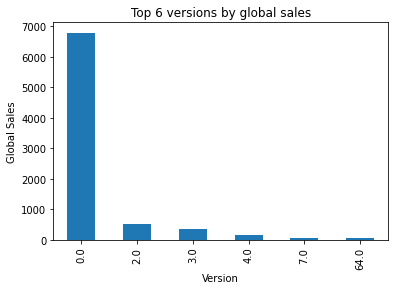

In [ ]:
# comparar entre las versiones de los juegos las ventas aumentan o disminuyen

# Seleccionamos las columnas relevantes
df_versions = df[['Name', 'Global_Sales']].copy()

# Agregamos una nueva columna que indica la versión del juego
df_versions['Version'] = df_versions['Name'].str.extract('(\d+)$', expand=False)
df_versions['Version'] = pd.to_numeric(df_versions['Version'], errors='coerce').fillna(0)

# Creamos una pivot table para calcular la suma de ventas globales por versión del juego
pivot_versions = df_versions.pivot_table(values='Global_Sales', index='Version', aggfunc='sum')

# Ordenamos las versiones por cantidad de ventas globales
pivot_versions = pivot_versions.sort_values(by='Global_Sales', ascending=False)

print(pivot_versions)
# Graficamos un histograma con las 6 versiones más comunes
top_versions = pivot_versions.head(6)
top_versions.plot(kind='bar', y='Global_Sales', legend=False)
plt.xlabel('Version')
plt.ylabel('Global Sales')
plt.title('Top 6 versions by global sales')
plt.show()

In [ ]:
# ¿Cuáles son los juegos más vendidos en todo el mundo?

top_games = df.sort_values(by='Global_Sales', ascending=False).head(10)
print(top_games[['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']])


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                wii sports      Wii  2006.0        Sports  Nintendo   
1     2          super mario bros      NES  1985.0      Platform  Nintendo   
2     3            mario kart wii      Wii  2008.0        Racing  Nintendo   
3     4         wii sports resort      Wii  2009.0        Sports  Nintendo   
4     5   pokemon redpokemon blue       GB  1996.0  Role-Playing  Nintendo   
5     6                    tetris       GB  1989.0        Puzzle  Nintendo   
6     7      new super mario bros       DS  2006.0      Platform  Nintendo   
7     8                  wii play      Wii  2006.0          Misc  Nintendo   
8     9  new super mario bros wii      Wii  2009.0      Platform  Nintendo   
9    10                 duck hunt      NES  1984.0       Shooter  Nintendo   

   Global_Sales  
0         82.74  
1         40.24  
2         35.82  
3         33.00  
4         31.37  
5         30.26  
6         30.01

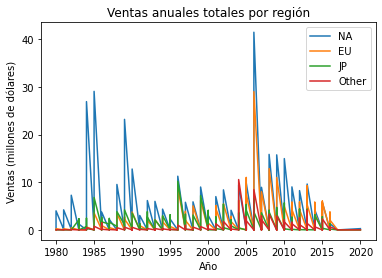

In [ ]:
#¿Hay alguna diferencia en las ventas de juegos por región (NA, EU, JP y otros), por años?


# Agrupar los datos por año y región y sumar las ventas
ventas_por_anio_region = df.groupby(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']).sum().reset_index()

# Crear gráfico de línea para ventas por año y región
plt.plot(ventas_por_anio_region['Year'], ventas_por_anio_region['NA_Sales'], label='NA')
plt.plot(ventas_por_anio_region['Year'], ventas_por_anio_region['EU_Sales'], label='EU')
plt.plot(ventas_por_anio_region['Year'], ventas_por_anio_region['JP_Sales'], label='JP')
plt.plot(ventas_por_anio_region['Year'], ventas_por_anio_region['Other_Sales'], label='Other')
plt.title('Ventas anuales totales por región')
plt.xlabel('Año')
plt.ylabel('Ventas (millones de dólares)')
plt.legend()
plt.show()

count    16327.000000
mean         0.540232
std          1.565732
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64


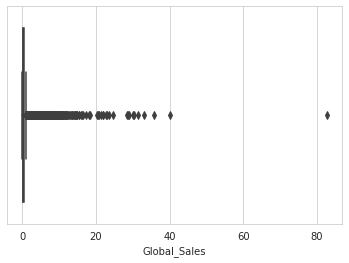

In [ ]:
#¿Hay algún juego en particular que sea excepcionalmente exitoso o no haya vendido bien?   valores atipicos

sns.set_style('whitegrid')

sns.boxplot(x='Global_Sales', data=df)
print(df['Global_Sales'].describe())

<AxesSubplot:xlabel='Genre', ylabel='Platform'>

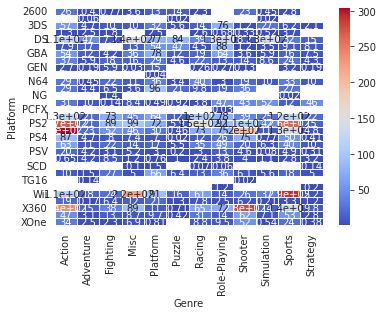

In [ ]:
#¿Hay alguna correlación entre la plataforma y el género del juego con las ventas?

pivot = pd.pivot_table(df, values='Global_Sales', index='Platform', columns='Genre', aggfunc='sum')

sns.heatmap(pivot, cmap='coolwarm', annot=True, linewidths=0.5)